## Dividend Project
Task: compare high dividend growth stocks to low dividend growth stocks during uncertain times (corona-pandemic). 

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from pandas_datareader import data
import yfinance as yf

In [19]:
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
Tickers = df['Symbol']
tickers = Tickers  [0:23] #limited the sample only due to running time
tickers1 = Tickers [0:23]
tickers = list(tickers)

In [14]:
start = '2010-01-01'
end = '2020-12-31'
data = pd.DataFrame()
for i in tickers:
    series = yf.Ticker(i).dividends.loc[start:end]
    data = pd.concat([data, series], axis=1)
data.columns=tickers

In [20]:
df1 = data.apply(lambda x: pd.Series(x.dropna().values))

In [21]:
df1 = df1.pct_change()

In [22]:
df1summa = pd.DataFrame([1+x for index,x in df1.iterrows()])
df1summa = df1summa.cumprod()
df1summa = list(df1summa.iloc[-1])

In [23]:
dff = pd.DataFrame()
dff['Symbols'] = tickers1
dff['Sum of DG'] = df1summa
dff.index
dff

,Symbols,Sum of DG
0,MMM,2.800000
1,ABT,1.875782
2,ABBV,2.950000
3,ABMD,NaN
4,ACN,2.346667
5,ATVI,2.733333
6,ADBE,NaN
7,AMD,NaN
8,AAP,4.166667
9,AES,3.575000


In [24]:
dff = dff.sort_values(['Sum of DG'], ascending=True).dropna(axis=0)
dff

,Symbols,Sum of DG
1,ABT,1.875782
20,LNT,1.924051
10,AFL,2.000000
4,ACN,2.346667
11,A,2.516391
21,ALL,2.700000
5,ATVI,2.733333
15,ALB,2.750000
0,MMM,2.800000
2,ABBV,2.950000


In [25]:
#build portfolio of high and low growth
portfolio1 = dff[(int((4/5)*len(dff))):len(dff)]
print(portfolio1)
portfolio2 = dff[0:int(((1/5)*len(dff)))]
print(portfolio2)

   Symbols  Sum of DG
9      AES   3.575000
14     ALK   3.750000
19    ALLE   4.000000
8      AAP   4.166667
   Symbols  Sum of DG
1      ABT   1.875782
20     LNT   1.924051
10     AFL   2.000000


In [26]:
symbols1 = list(portfolio1['Symbols'])
portf1 = pdr.get_data_yahoo(symbols1, start=start, end=end)
symbols2 = list(portfolio2['Symbols'])
portf2 = pdr.get_data_yahoo(symbols2, start=start, end=end)

lista = []
def weights(symbols):
    for w in symbols:
        weight = 1/len(symbols)
        lista.append(weight)
    return lista
lista1 = []
def weights2(symbols):
    for w in symbols:
        weight = 1/len(symbols)
        lista1.append(weight)
    return lista1
weight1 = weights(symbols1)
weight2 = weights2(symbols2)


In [27]:
portf1 = portf1['Adj Close']
portf2 = portf2['Adj Close']

In [28]:
ret_data1 = portf1.pct_change()[1:]
weighted_returns1 = (weight1 * ret_data1)
port_ret1 = weighted_returns1.sum(axis=1)

ret_data2 = portf2.pct_change()[1:]
weighted_returns2 = (weight2 * ret_data2)
port_ret2 = weighted_returns2.sum(axis=1)

<AxesSubplot:title={'center':'Low growth div returns'}, xlabel='Date'>

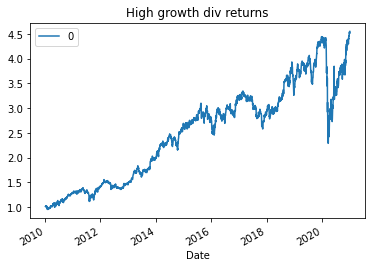

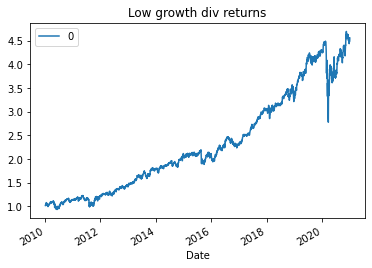

In [29]:
cum_datalist_growth=pd.DataFrame([1+x for x in port_ret1], index=ret_data1.index)
growth_stocks = cum_datalist_growth.cumprod()
growth_stocks.plot(title = 'High growth div returns')

cum_datalist_yield = pd.DataFrame([1+x for x in port_ret2], index=ret_data2.index)
yield_stocks = cum_datalist_yield.cumprod()
yield_stocks.plot(title = 'Low growth div returns')

In [30]:
#from the graphs, one can draw the conclusion that the high-growth stocks actually recovers must slower from a Covid-19 pandemic.
#compared to low growth. In addition (again only drawing from the graphs) the volatility seems lower for low growth stocks.
sharpe_growth = port_ret1.mean()/port_ret1.std()
sharpe_yield = port_ret2.mean()/port_ret2.std()

In [31]:
print(sharpe_growth)
print(sharpe_yield)
#as expected the sharpe sort of confirms the findings. 

0.046463541837119995
0.05312300996412517


In [ ]:
'''
for comparison to high dividend yield: (later work)

df2 = data.apply(lambda x: pd.Series(x.dropna().values))
df3 = pdr.get_data_yahoo(tickers, start=start, end=end)['Adj Close']
'''